In [1]:
import numpy as np
from numpy import pi

import matplotlib.pyplot as plt

import gprob as gp
from gprob import normal, iid_repeat

In [2]:
# The calculation of ponderomotive squeezing.

gamma_meas = 2*pi * 1e3  # Measurement rate
gamma_0 = 2*pi * 2e2  # Intrinsic dissipation
nth = 1.1  # Thermal phonon occupancy
omega_res = 2*pi * 1e6

zeta = 0.03

freqs = np.linspace(-4e3, 4e3, 10**4) + omega_res / (2*pi)
oms = 2*pi * freqs

omega_res = omega_res * np.ones((len(freqs),))  # For shape compatibility.

sysm = np.array([[1j * oms -zeta * gamma_meas, omega_res],
                 [-omega_res, 1j * oms - zeta * gamma_meas]])
sysm = sysm.transpose((2, 0, 1))

sysminv = np.linalg.inv(sysm)

xin = iid_repeat(normal(), len(freqs))
pin = iid_repeat(normal(), len(freqs))
fxth = np.sqrt(gamma_0 * (nth + 0.5)) * iid_repeat(normal(), len(freqs))
fpth = np.sqrt(gamma_0 * (nth + 0.5)) * iid_repeat(normal(), len(freqs))

fvect = gp.stack([zeta * np.sqrt(2 * gamma_meas) * pin + fxth,
                  -np.sqrt(2 * gamma_meas) * xin + fpth])

xpspin = gp.einsum("ijk , ki -> ij", sysminv, fvect)

xspin = xpspin[:, 0]
pspin = xpspin[:, 1]

xout = xin - zeta * np.sqrt(gamma_meas) * pspin
pout = pin + np.sqrt(gamma_meas) * xspin

phi = pi / 2.2  # Detection phase

# Detection photocurrent
detpc = np.sin(phi) * xout + np.cos(phi) * pout

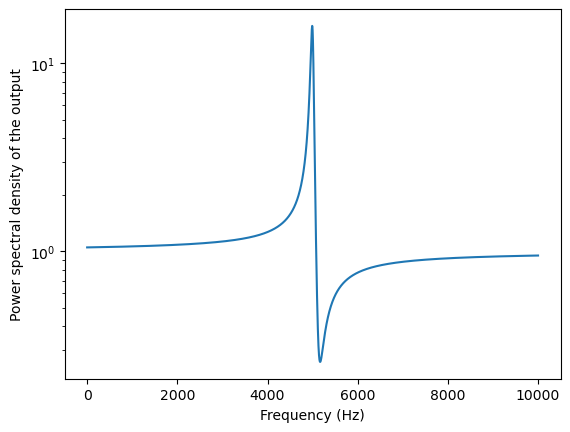

In [3]:
plt.plot(detpc.var())
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power spectral density of the output");

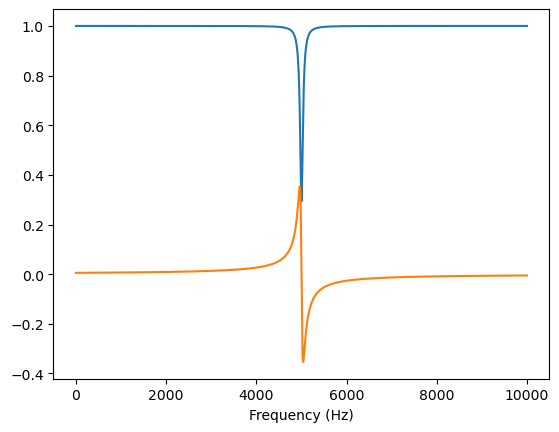

In [4]:
# The real and imaginary parts of the correlations between 
# the input and output x.

plt.plot(np.real(gp.cov(xout, xin)))
plt.plot(np.imag(gp.cov(xout, xin)))
plt.xlabel("Frequency (Hz)");